In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import plotly.graph_objects as go
import math

In [ ]:
class mugas_vibration_functions:
  
    def __init__(self): 
        self=[];

    def dynamicSystemModel(self, X, t, A, B, cParameters):
        dXdt=A @ X + B * self.controlFn(t, cParameters);
        self.X=X;
        return dXdt

    def controlFn(self, t, cParameters):
        return cParameters[0]*np.cos(cParameters[1] * t)

    def simulateDySystem(self, Tmax, dT, X0, A,B, cParameters, xLabel, yLabel):
        t = np.linspace(0, Tmax, int(Tmax/dT+1))
        sol = odeint(self.dynamicSystemModel, X0, t, args=(A, B, cParameters));
        self.soln=sol;
        fig = go.Figure()
        [nt,nS]=sol.shape;

        # Add traces
        for nn in range(nS):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
            fig.update_layout(xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
        
        fig.show()
        return [t,sol,fig] 
    
    def animate_particle_motion(self, XX, axisRange, figTitle):
        xx=[jj[0] for jj in XX]
        yy=[jj[1] for jj in XX]
        zz=[jj[2] for jj in XX]

        fig = go.Figure(
            data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                            mode="markers",
                            marker=dict(color="red", size=10)),
                go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                            mode="lines",
                            line=dict(color="blue", width=2))],
            layout=go.Layout(
                scene = dict(
                            xaxis=dict(range=axisRange[0], autorange=False),
                            yaxis=dict(range=axisRange[1], autorange=False),
                            zaxis=dict(range=axisRange[2], autorange=False),
                            aspectratio=dict(x=1, y=1, z=1),
                ),
                title_text=figTitle, hovermode="closest",
                updatemenus=[dict(type="buttons",
                                buttons=[dict(label="Play",
                                                method="animate",
                                                args=[None])])]),
            frames=[go.Frame(
                data=[go.Scatter3d(
                    x=[p[0]],
                    y=[p[1]],
                    z=[p[2]],
                    name='Particle',
                    mode="markers",
                    marker=dict(color="red", size=10))])

                for p in XX]
        )

        fig.show()
        return fig

    def animate_2D_scatter_plot(self, x, YY, xlabel, ylabel, title):
        fig = go.Figure(data=[go.Scatter(x=x,y=YY[0,:])],
                layout=go.Layout(
                    xaxis={'title':xlabel},
                    yaxis={'title':ylabel,'range':[1.1*YY.min(),1.1*YY.max()]},
                    title={'text':title,'y':0.9,'x':0.5, 'xanchor': 'center','yanchor': 'top'},
                    scene = dict(aspectratio=dict(x=1, y=1)),    
                    hovermode="closest",
                    updatemenus=[dict(type="buttons",
                                    buttons=[dict(label="Play",
                                                    method="animate",
                                                    args=[None])])]
                    ),
            frames=[go.Frame(data=[go.Scatter(x=x,y=y)]) for y in YY]
        )

        #fig.show()
        return fig

In [ ]:
mv=mugas_vibration_functions()

In [ ]:

from sympy import *

#Q - Flow Induced Resonance: Group Rankine-FI#

Flow-induced resonance (FIR) is a phenomenon that occurs when fluid flow passes over an object, causing it to vibrate at a frequency that is related to the frequency of the fluid flow. This phenomenon is particularly important in the field of engineering, where it can cause significant damage to structures such as bridges, buildings, and aircraft.

FIR occurs when the natural frequency of an object matches the frequency of the fluid flow passing over it. As the fluid flows past the object, it creates alternating high and low pressure areas, causing the object to vibrate. If the vibration frequency is close to the natural frequency of the object, the amplitude of the vibration can increase rapidly, leading to significant damage or failure of the structure.

To prevent FIR, engineers can modify the 

shape and design of structures to avoid natural frequencies that are likely to match the frequency of the fluid flow. They can also add dampers or other devices to absorb or dissipate the energy of the vibrations. Additionally, numerical simulations and experimental studies can be performed to identify potential sources of FIR and develop mitigation strategies.


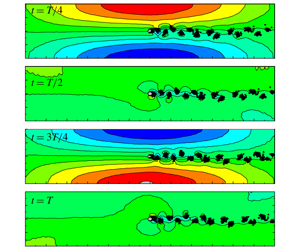

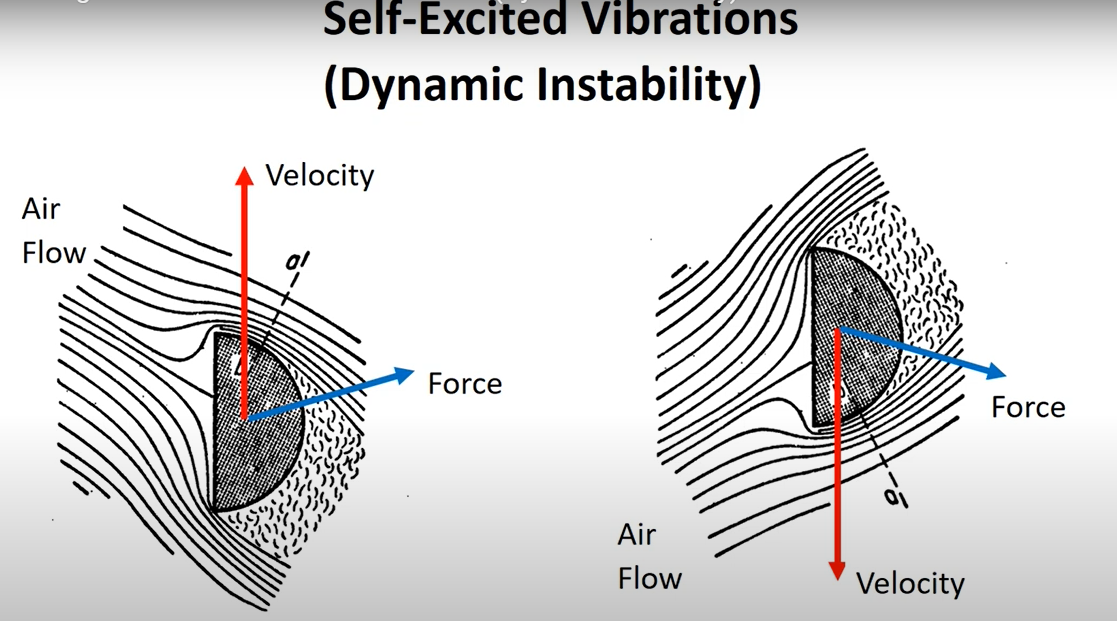

Flow-induced resonance (FIR) is a phenomenon that occurs when fluid flow passes over an object, causing it to vibrate at a frequency that is related to the frequency of the fluid flow. This phenomenon is particularly important in the field of engineering, where it can cause significant damage to structures such as bridges, buildings, and aircraft.

FIR occurs when the natural frequency of an object matches the frequency of the fluid flow passing over it. As the fluid flows past the object, it creates alternating high and low pressure areas, causing the object to vibrate. If the vibration frequency is close to the natural frequency of the object, the amplitude of the vibration can increase rapidly, leading to significant damage or failure of the structure.

To prevent FIR, engineers can modify the shape and design of structures to avoid natural frequencies that are likely to match the frequency of the fluid flow. They can also add dampers or other devices to absorb or dissipate the energy of the vibrations. Additionally, numerical simulations and experimental studies can be performed to identify potential sources of FIR and develop mitigation strategies.





list all equation related vibration equation above case 
!
The equations related to vibration in the case of flow-induced resonance include:

Natural frequency equation: This equation relates the natural frequency of an object to its physical properties, such as its mass, stiffness, and damping coefficient. It is given by:

$f_n = \frac{1}{2}  \sqrt\frac{k}{m}$

where $f_n$ is the natural frequency, k is the stiffness of the object, m is its mass, and π is a mathematical constant.

Damping equation: This equation describes the damping force that opposes the motion of a vibrating object. It is given by:

$F_d = c v$

where $F_d$ is the damping force, c is the damping coefficient, and v is the velocity of the object.

Forced vibration equation: This equation describes the motion of an object subjected to an external force, such as the fluid flow in the case of FIR. It is given by:

$m \frac{d^2x}{dt^2} + c \frac {dx}{dt} + k  x = F(t)$

where m is the mass of the object, c is the damping coefficient, k is the stiffness of the object, x is the displacement of the object from its equilibrium position, and F(t) is the external force acting on the object.

Resonance frequency equation: This equation describes the frequency at which resonance occurs between an object and an external force. In the case of FIR, this frequency is the same as the natural frequency of the object.

Resonance equation: When the frequency of the external force is close to the natural frequency of the structure, resonance can occur. The equation for resonance is:

$f_r = \frac{f_n}{\sqrt{1-β}}$